In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import h5py

f = h5py.File('kastner_generation_09_01_2024.hdf5', 'r')

# df = pd.read_csv('data_generation_output_04_01_2024.csv')

In [108]:
list(f.keys())

['MB_500', 'MF_500', 'MF_to_MB_201_alpha_100', 'MF_to_MB_5001']

In [107]:
list(f.keys())
f['MB_500']['episode_data'].shape
f['MB_500']['model_params']['table'][:]

array([(16200, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.545]),
       (16201, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.55 ]),
       (16202, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.575]),
       (16203, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.615]),
       (16204, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.63 ]),
       (16205, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.545]),
       (16206, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.58 ]),
       (16207, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.52 ]),
       (16208, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.59 ]),
       (16209, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.555]),
       (16210, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.57 ]),
       (16211, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.535]),
       (16212, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.6  ]),
       (16213, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.58 ]),
       (16214, [8.   , 0.   , 0.2  , 8.   , 0.   , 0.3  , 0.48

In [2]:
df = pd.DataFrame(f['model_params'])
df = pd.read_hdf('kastner_generation_05_01_2024.hdf5', 'model_params')

In [3]:
df.to_hdf('temp.hdf5', key='asdf/bar')

In [4]:
f2 = h5py.File('temp.hdf5')

In [9]:
import os
os.path.join('asdf', '')

'asdf/'

In [7]:
df.head()

,beta_mb,beta_mf,alpha,beta_stage2,beta_stick,Q_MB_rare_prob,episode_reward_rate
0,7.5200,0.4800,0.067080,8.0,0.0,0.3,0.555
1,7.7632,0.2368,0.200000,8.0,0.0,0.3,0.560
2,4.7200,3.2800,0.242139,8.0,0.0,0.3,0.590
3,7.2400,0.7600,0.053762,8.0,0.0,0.3,0.595
4,2.2944,5.7056,0.200000,8.0,0.0,0.3,0.550


In [38]:
import os
import h5py
import pandas as pd
import numpy as np

path = './kastner_generation_05_01_2024'

# Get all the files in the folder
files = os.listdir(path)
files = [os.path.join(path, file) for file in files]

out_dfs = []
for file in files:
    with open(file, 'rb') as f:
        df = pd.read_pickle(f)
        out_dfs.append(df)

out_df = pd.concat(out_dfs, axis=0)
# give it a new index
out_df.reset_index(inplace=True, drop=True)

In [87]:
df = out_df.copy()

In [56]:
df.dtypes

beta_mb                float64
beta_mf                float64
alpha                  float64
beta_stage2            float64
beta_stick             float64
Q_MB_rare_prob         float64
episode_reward_rate    float64
episode_data            object
dtype: object

In [54]:
df.to_hdf('temp2.hdf5', key='table')

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_32691/2757459795.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['episode_data'], dtype='object')]

  df.to_hdf('temp2.hdf5', key='table')


In [88]:
AB = df.loc[df.alpha==0.2]
A_MF = AB.loc[AB.beta_mb==0.0]
A_MB = AB.loc[AB.beta_mf==0.0]

# B is AB without A_MF and A_MB
B = AB.loc[list(set(AB.index) - set(A_MF.index) - set(A_MB.index))]

C = df.loc[df.alpha != 0.2]

AB.shape, A_MF.shape, A_MB.shape, B.shape, C.shape

# move the first row of A_MF and A_MB to B
B = pd.concat([B, A_MF.iloc[0].to_frame().T.values, A_MB.iloc[0].to_frame().T.values], axis=0)

# remove from A_MF and A_MB
A_MF = A_MF.iloc[1:]
A_MB = A_MB.iloc[1:]

AB.shape, A_MF.shape, A_MB.shape, B.shape, C.shape

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [89]:
a1, a2 = A_MF.iloc[0].to_frame().T, A_MB.iloc[0].to_frame().T

In [90]:
a1.dtypes

beta_mb                object
beta_mf                object
alpha                  object
beta_stage2            object
beta_stick             object
Q_MB_rare_prob         object
episode_reward_rate    object
episode_data           object
dtype: object

In [94]:
a1.columns

Index(['beta_mb', 'beta_mf', 'alpha', 'beta_stage2', 'beta_stick',
       'Q_MB_rare_prob', 'episode_reward_rate', 'episode_data'],
      dtype='object')

In [97]:
for col in a1.columns:
    a1[col] = a1[col].astype(B[col].dtype)

In [98]:
a1.dtypes

beta_mb                float64
beta_mf                float64
alpha                  float64
beta_stage2            float64
beta_stick             float64
Q_MB_rare_prob         float64
episode_reward_rate    float64
episode_data            object
dtype: object

In [100]:
a1.iloc[0, -1]

array([[1, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1,

In [58]:
B.dtypes

beta_mb                object
beta_mf                object
alpha                  object
beta_stage2            object
beta_stick             object
Q_MB_rare_prob         object
episode_reward_rate    object
episode_data           object
dtype: object

In [60]:
B.tail()

,beta_mb,beta_mf,alpha,beta_stage2,beta_stick,Q_MB_rare_prob,episode_reward_rate,episode_data
16180,5.3264,2.6736,0.2,8.0,0.0,0.3,0.53,"[[1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0,..."
16184,4.9792,3.0208,0.2,8.0,0.0,0.3,0.65,"[[1, 1, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0,..."
16192,4.6944,3.3056,0.2,8.0,0.0,0.3,0.555,"[[0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0,..."
2889,0.0,8.0,0.2,8.0,0.0,0.3,0.545,"[[1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1,..."
16199,8.0,0.0,0.2,8.0,0.0,0.3,0.645,"[[0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1,..."


In [46]:
# convert A_MF.iloc[0] to a one row dataframe


beta_mb                                                              0.0
beta_mf                                                              8.0
alpha                                                                0.2
beta_stage2                                                          8.0
beta_stick                                                           0.0
Q_MB_rare_prob                                                       0.3
episode_reward_rate                                                0.635
episode_data           [[1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0,...
Name: 2890, dtype: object

In [48]:
B

,beta_mb,beta_mf,alpha,beta_stage2,beta_stick,Q_MB_rare_prob,episode_reward_rate,episode_data
13,7.2544,0.7456,0.2,8.0,0.0,0.3,0.525,"[[1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1,..."
18,3.4656,4.5344,0.2,8.0,0.0,0.3,0.515,"[[0, 1, 0, 0], [1, 1, 0, 0], [1, 0, 1, 0], [0,..."
24,5.8592,2.1408,0.2,8.0,0.0,0.3,0.65,"[[0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0,..."
25,6.0976,1.9024,0.2,8.0,0.0,0.3,0.615,"[[0, 0, 0, 1], [0, 1, 0, 1], [1, 1, 0, 1], [1,..."
29,4.4688,3.5312,0.2,8.0,0.0,0.3,0.54,"[[0, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0,..."
...,...,...,...,...,...,...,...,...
16180,5.3264,2.6736,0.2,8.0,0.0,0.3,0.53,"[[1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0,..."
16184,4.9792,3.0208,0.2,8.0,0.0,0.3,0.65,"[[1, 1, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0,..."
16192,4.6944,3.3056,0.2,8.0,0.0,0.3,0.555,"[[0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0,..."
2889,0.0,8.0,0.2,8.0,0.0,0.3,0.545,"[[1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1,..."


In [29]:
temp = A_MF.apply(lambda row: tuple([row[x] for x in ['beta_mb', 'beta_mf', 'alpha', 'beta_stage2', 'beta_stick',
       'Q_MB_rare_prob']]), axis=1)


temp
temp.unique()
# actually extract the values as a tuple


array([(0.0, 8.0, 0.2, 8.0, 0.0, 0.3)], dtype=object)

In [40]:
C1 = df.loc[df.alpha < 0.02]
C2 = df.loc[df.alpha > 0.5]

C3 = C1.loc[(df.beta_mb < 0.4)]
C4 = C1.loc[(df.beta_mf < 0.4)]
C1.shape, C2.shape, C3.shape, C4.shape

((3216, 7), (2211, 7), (160, 7), (176, 7))

Text(0.5, 1.0, 'Kastner generation subject reward rate variation')

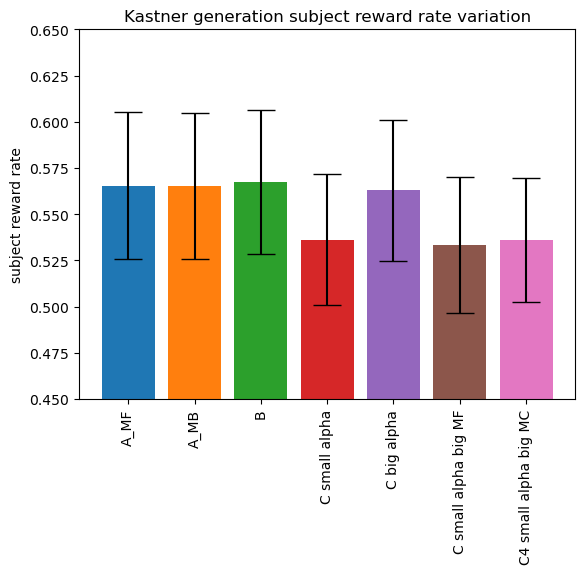

In [37]:
for sub_df, x in zip([A_MF, A_MB, B, C1, C2, C3, C4], ['A_MF', 'A_MB', 'B', 'C small alpha', 'C big alpha', 'C small alpha big MF', 'C4 small alpha big MC']):
    y = sub_df['episode_reward_rate'].mean()
    yerr = sub_df['episode_reward_rate'].std()
    # x is name of the group
    plt.bar(x, y, yerr=yerr, capsize=10)
    plt.ylim([0.45, 0.65])

plt.xticks(rotation=90)
plt.ylabel('subject reward rate')
plt.title('Kastner generation subject reward rate variation')

In [20]:
C1 = df.loc[df.alpha < 0.02]
C2 = df.loc[df.alpha > 0.5]
C1.shape, C2.shape

C3 = C1.loc[(df.beta_mb < 2.0)]
C4 = C1.loc[(df.beta_mf < 2.0)]

((3216, 7), (2211, 7))

In [33]:
# 31st december 1804 run used n=160
df['rew_rate_std'] = df.rew_rate_stderr * np.sqrt(160)
# df['lam'] = df.beta_mb + df.beta_mf0 + df.beta_mf1

In [34]:
unique_betas = df.loc[df.lam == 1.0, ['beta_mf0', 'beta_mf1', 'beta_mb']].values
unique_betas = np.unique(unique_betas, axis=0)
unique_betas.shape

(30, 3)

In [35]:
beta = unique_betas[10]
betas = df.loc[:, ['beta_mf0', 'beta_mf1', 'beta_mb']].values
betas.shape
print(beta)
np.where(np.all(betas == beta, axis=1))

[0.23738708 0.76261292 0.        ]


(array([  14,   50,   73,  102,  134,  164,  195,  224,  255,  285,  320,
         343,  375,  404,  435,  465,  497,  527,  554,  584,  615,  646,
         675,  708,  737,  764,  795,  825,  855,  885,  918,  944,  980,
        1005, 1034, 1065, 1095, 1125, 1155, 1184, 1214, 1246, 1275, 1305,
        1334, 1363, 1394, 1424, 1455, 1485, 1515, 1547, 1573, 1603, 1633,
        1665, 1698, 1724, 1755, 1783, 1813, 1842, 1875, 1904, 1938, 1963,
        1995, 2024, 2053, 2084, 2115, 2145]),)

In [25]:
df.lam.unique()

array([1., 1., 1.])

beta: [0.23738708 0.76261292 0.        ]


Text(0, 0.5, 'reward rate')

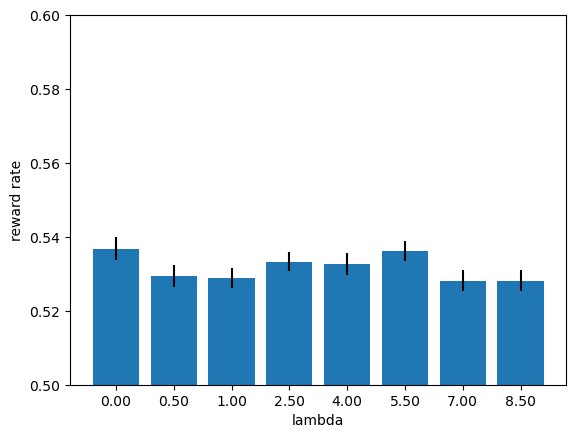

In [38]:

beta = unique_betas[10]
betas = df.loc[:, ['beta_mf0', 'beta_mf1', 'beta_mb']].values
print(f'beta: {beta}')
beta_cond = np.all(betas == beta, axis=1)
loc_cond = beta_cond & (df.alpha == 0.01)

# sns.barplot(x='lam', y='rew_rate', data=df[loc_cond])
x = df.loc[loc_cond, 'lam']
x = [f'{i:.2f}' for i in x]
y = df.loc[loc_cond, 'rew_rate']
yerr = df.loc[loc_cond, 'rew_rate_stderr']
plt.bar(x, y, yerr=yerr)
plt.ylim([0.5, 0.6])
plt.xlabel('lambda')
plt.ylabel('reward rate')

In [40]:
alphas = [0.01 * 1.2**i for i in range(22)]
alphas

[0.01,
 0.012,
 0.0144,
 0.017279999999999997,
 0.020736,
 0.024883199999999994,
 0.029859839999999995,
 0.03583180799999999,
 0.04299816959999998,
 0.051597803519999985,
 0.061917364223999974,
 0.07430083706879997,
 0.08916100448255997,
 0.10699320537907195,
 0.12839184645488633,
 0.1540702157458636,
 0.18488425889503632,
 0.22186111067404354,
 0.26623333280885225,
 0.3194799993706227,
 0.38337599924474725,
 0.4600511990936967]

In [43]:
lams = [0.0, 0.1, 0.3, 0.6] + [0.6 + 0.5 * i for i in range(1, 20)]
lams

[0.0,
 0.1,
 0.3,
 0.6,
 1.1,
 1.6,
 2.1,
 2.6,
 3.1,
 3.6,
 4.1,
 4.6,
 5.1,
 5.6,
 6.1,
 6.6,
 7.1,
 7.6,
 8.1,
 8.6,
 9.1,
 9.6,
 10.1]

In [61]:
import data_generation
betas_list = list(data_generation.unif_random_simplex_sample_with_0s(3, 160, 5, print_=True))

40.0
(0,) 1
(1,) 1
(2,) 1
(0, 1) 20
(0, 2) 19
(1, 2) 19
(0, 1, 2) 99


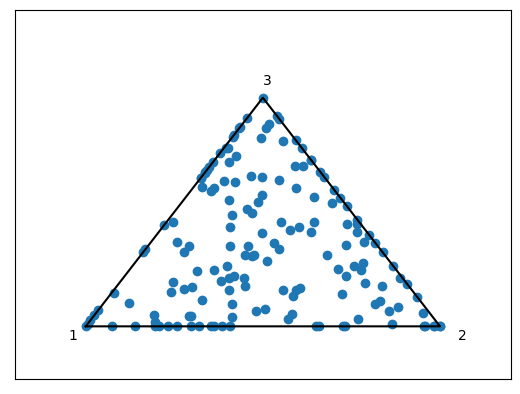

In [62]:
from py3simplex import plotSimplex
bl = np.array(betas_list)
fig = plotSimplex(bl)

In [63]:
import h5py

In [2]:
from data_generation import *
kwargs = MODEL_KWARGS.copy()
model = models.Model(**kwargs)
outs = model.perform_trials(
        reward_probs_list, save_Qs=False, save_probs=False, randomise=False)

In [3]:
foo = outs.values.astype(np.uint8)
foo[:, 3].mean()

0.495

In [4]:
manager = Manager()
lock = manager.Lock()

In [5]:
kwargs_list = []
output_file = 'data_generation_output_04_01_2024_episodic.csv'

for alpha in alphas:
    for lam in lams:
        for my_betas in betas_list:
            # beta_mb, beta_mf0, beta_mf1 = lam * my_betas
            beta_mb, beta_mf0, beta_mf1 = my_betas
            kwargs = {
                'beta_mb': beta_mb,
                'beta_mf0': beta_mf0,
                'beta_mf1': beta_mf1,
                'lam': lam,
                'alpha': alpha
            }
            kwargs_list.append((kwargs, output_file, 35))

In [6]:
al = [(lock, *args) for args in kwargs_list]
al[0]

(<AcquirerProxy object, typeid 'Lock' at 0x107721a60>,
 {'beta_mb': 1.0, 'beta_mf0': 0.0, 'beta_mf1': 0.0, 'lam': 0.0, 'alpha': 0.01},
 'data_generation_output_04_01_2024_episodic.csv',
 35)

In [7]:
do_kwargs_star(al[0])

{'beta_stage2': 8.0,
 'beta_mf0': 0.0,
 'beta_mf1': 0.0,
 'beta_mb': 1.0,
 'beta_stick': 0.0,
 'Q_MB_rare_prob': 0.3,
 'alpha': 0.01,
 'lam': 0.0}

In [8]:
asdf = pd.read_csv('data_generation_output_04_01_2024_episodic.csv')

In [11]:
eval(asdf.iloc[0].episode_data)

SyntaxError: invalid syntax (<string>, line 1)

In [14]:
foo = {'a': 1}
bar = {'b': 2}
def asdf(foo):
    foo = copy(bar.copy().update(foo)
    print(foo)
asdf(foo)

None


In [15]:
output_folder = 'data_generation_output_04_01_2024_episodic'
fns = os.listdir(output_folder)
fns = [os.path.join(output_folder, fn) for fn in fns]
fns[0]

'data_generation_output_04_01_2024_episodic/e53c15cd-5bd1-4016-a18c-d43657727c61.csv'

In [17]:
temp = pd.read_csv(fns[0])
temp

,beta_mb,beta_mf0,beta_mf1,lam,alpha,beta_stage2,beta_stick,Q_MB_rare_prob,episode_reward_rate,episode_data
0,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.495,[[0 0 0 0]\n [1 0 1 0]\n [0 0 0 0]\n [1 1 1 1]...
1,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.495,[[0 0 0 0]\n [1 1 0 1]\n [0 1 0 1]\n [0 0 0 1]...
2,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.530,[[0 1 0 1]\n [1 0 1 0]\n [0 1 1 0]\n [1 1 0 0]...
3,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.605,[[0 0 0 1]\n [1 1 0 1]\n [0 0 0 1]\n [0 1 0 1]...
4,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.590,[[1 1 0 0]\n [0 1 0 1]\n [0 0 1 1]\n [1 1 0 1]...
5,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.530,[[1 0 1 0]\n [1 1 1 0]\n [0 0 0 1]\n [1 0 1 1]...
6,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.580,[[0 1 0 1]\n [0 1 1 1]\n [0 1 1 1]\n [0 1 0 1]...
7,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.465,[[0 0 0 0]\n [0 0 1 0]\n [0 0 1 0]\n [0 1 1 0]...
8,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.565,[[1 1 0 1]\n [0 0 0 1]\n [1 1 1 0]\n [0 0 0 1]...
9,0.167987,0.783813,0.0482,0.0,0.01,8.0,0.0,0.3,0.595,[[1 1 1 0]\n [0 1 1 1]\n [0 1 0 1]\n [0 1 0 1]...


In [12]:
import uuid
str(uuid.uuid4()) + '.csv'

'f861f014-d063-4747-a010-28706bd031c5.csv'

In [8]:
lock, kwargs, output_file, n = al[0]
episodes_data, full_kwargs = model_reward(kwargs, n=n)
reward_rates = [episode_data[:, 3].mean() for episode_data in episodes_data]
# do_kwargs_star(al[0])

In [14]:
len(episodes_data)
episodes_data[0].shape
len(reward_rates)

35

(200, 4)

35

In [20]:
a = pd.Series(episodes_data)
b = pd.Series(reward_rates)
c = pd.DataFrame([full_kwargs] * len(reward_rates), columns=full_kwargs.keys())

In [24]:
foo = pd.concat([a, b, c], axis=1)
# change first two column names
# foo.columns[0] = 'episode_data'
# foo.columns[1] = 'episode_reward_rate'
foo.columns = ['episode_data', 'episode_reward_rate'] + list(full_kwargs.keys())
foo.head()

,episode_data,episode_reward_rate,beta_stage2,beta_mf0,beta_mf1,beta_mb,beta_stick,Q_MB_rare_prob,alpha,lam
0,"[[0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1], [0,...",0.550,8.0,0.0,0.0,1.0,0.0,0.3,0.01,0.0
1,"[[1, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1,...",0.535,8.0,0.0,0.0,1.0,0.0,0.3,0.01,0.0
2,"[[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",0.520,8.0,0.0,0.0,1.0,0.0,0.3,0.01,0.0
3,"[[1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [1,...",0.525,8.0,0.0,0.0,1.0,0.0,0.3,0.01,0.0
4,"[[1, 1, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1,...",0.600,8.0,0.0,0.0,1.0,0.0,0.3,0.01,0.0


In [118]:
# # n x 3
# unique_betas = df.loc[df.lam == 1.0, ['beta_mf0', 'beta_mf1', 'beta_mb']].values
# betas = df.loc[:, ['beta_mf0', 'beta_mf1', 'beta_mb']].values
# betas_normed = betas.T / df.lam.values
# betas_normed = betas_normed.T

# # replace nans in betas_normed with zeros
# betas_normed[np.isnan(betas_normed)] = 0
# df['betas_normed'] = betas_normed.tolist()

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_15116/2302875295.py:4: RuntimeWarning: invalid value encountered in divide
  betas_normed = betas.T / df.lam.values


Text(0, 0.5, 'reward rate')

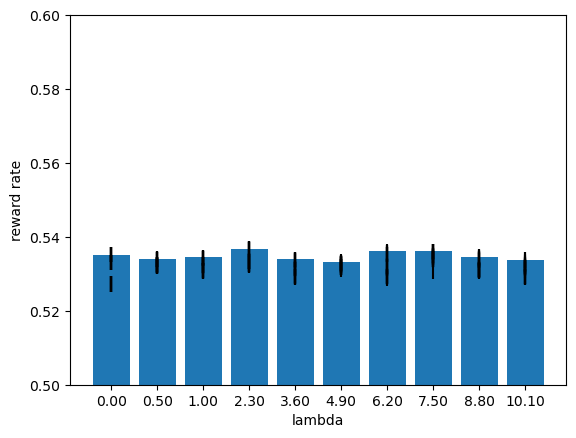

In [122]:
# for a fixed betas, alpha, plot rew_rate as a function of lam
cols = ['beta_mf0', 'beta_mf1', 'beta_mb', 'lam', 'alpha']
cols2 = cols.copy()
cols.remove('lam')
# row = df.sample()
# out = {k: row[k].values[0] for k in cols}
# for k, v in out.items():
#     print(k, v)
# loc_conds = [df[col] == v for col, v in out.items()]
# loc_cond = np.logical_and.reduce(loc_conds)

betas_normed = np.vstack(df['betas_normed'].tolist())
beta_cond = np.all(betas_normed == beta, axis=1)
beta_cond = np.max(np.abs(betas_normed - beta), axis=1).min() < 1e-6
loc_cond = beta_cond & (df.alpha == 0.01)
# sns.barplot(x='lam', y='rew_rate', data=df[loc_cond])
x = df.loc[loc_cond, 'lam']
x = [f'{i:.2f}' for i in x]
y = df.loc[loc_cond, 'rew_rate']
yerr = df.loc[loc_cond, 'rew_rate_stderr']
plt.bar(x, y, yerr=yerr)
plt.ylim([0.5, 0.6])
plt.xlabel('lambda')
plt.ylabel('reward rate')

In [80]:
df.loc[beta_cond]

,beta_stage2,beta_mf0,beta_mf1,beta_mb,beta_stick,Q_MB_rare_prob,alpha,rew_rate,rew_rate_stderr,rew_rate_std,lam,betas_normed
